In [63]:
from pylab import *
from matplotlib.pyplot import imshow
import numpy as np

%matplotlib inline

from PIL import Image
from pycoast import ContourWriter

In [64]:
proj4_string = '+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'
# area_extent = (-4194304, -4194304, 4194304, 4194304)
area_extent = array((-5000000.0,-5000000.0,5000000.0,5000000.0))
area_def = (proj4_string, area_extent)

# set resolution in meters
# res = 30 # 30m <-> 1:100000
resM = 5000
# size = int(256*math.pow(2, 14)/res)
size = abs(int(area_extent[0] - area_extent[2]) / resM)

if 1000 < resM <= 10000:
    res = 'i'
elif 100 < resM <= 1000:
    res = 'h'
elif 10 < resM <= 100:
    res = 'f'

In [65]:
img = Image.new("L", (size, size))

cw = ContourWriter('/media/SOLabNFS/store/auxdata/coastline')
cw.add_coastlines(img, area_def, resolution=res, fill=255, level=4, outline=None)
cw.add_rivers(img, area_def, resolution=res, level=11, outline=0)

img = np.ma.masked_equal(img, 255)

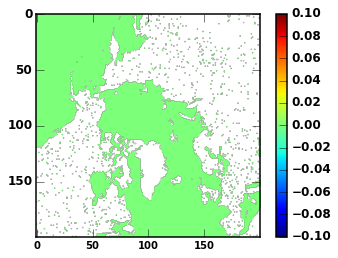

In [66]:
imshow(img[::10,::10])
colorbar()

In [67]:
import sys
import os

sys.path.append('/home/mag/Documents/repos/solab/posada/handlers/')

import Tiles.nctiles
reload(Tiles.nctiles)

from Tiles.nctiles import create_nc_tiles, write_attrib_to_nc, array_size_normalize
# %%timeit -r 1 -n 1

In [68]:
img = array_size_normalize(img)

In [69]:
# def create_nc_tiles(inpath, fn, out_dir, scale=1):
print "Creating NC tiles......."

pn = '/nfs1/store/nctiles/coastlines/GSHHS/epsg_3413/'
# pn = '/media/SOLabNFS/hyrax-cluster/data/public/allData/tzh/'

nc_path = os.path.join(pn, 'GSHHS_epsg_3413_' + str(resM) + 'm.nc')

if os.path.isfile(nc_path):
    os.remove(nc_path)

max_zoom_level = create_nc_tiles(img, nc_path, nc_data_type='u1')

 Please specify it as: 
 configpath = '/home/mag/Documents/repos/solab/PySOL/notebooks/pySAR/ASAR.json'
DEBUG:posada:Number of zoom levels: 3
DEBUG:posada:Tiling zoom level: 3
DEBUG:posada:Tiling zoom level: 2
DEBUG:posada:Tiling zoom level: 1
DEBUG:posada:Tiling zoom level: 0
INFO:posada:Writing netCDF-file


Creating NC tiles.......


In [48]:
startTime = datetime.datetime.strptime('20160421', "%Y%m%d")

write_attrib_to_nc(nc_path, area_extent, startTime,
                   max_zoom_level, resM)

print "%sMb" % str(np.round(os.path.getsize(nc_path)/1024/1024))

TypeError: write_attrib_to_nc() takes at least 6 arguments (5 given)

### JSON parameter definitions

In [1]:
from urllib import urlopen
import json

In [28]:
import json

gshhsJSON = {}
# 'u1' (NC_UBYTE)  2**8 =0-255
# 'u2' (NC_USHORT  2**16=0-65535
# 'u4' (NC_UINT)   2**32=0-4294967295
# 'u8' (NC_UINT64) 2**64=0-18446744073709551615
# if 2\two data types are specified-we generate nc tyle pyramid and export data at max resolution to nc file
gshhsJSON['nc_data_type'] = ['u1']
# asarJSON['nc_data_type'] = ['u1']

with open('/nfs1/store/nctiles/coastlines/GSHHS/GSHHS.json', 'w') as outfile:
    json.dump(gshhsJSON, outfile, indent=4, separators=(',', ': '), sort_keys=True)

outfile.close()

In [29]:
config_dict = json.load(urlopen('/nfs1/store/nctiles/coastlines/GSHHS/GSHHS.json'))

In [30]:
config_dict.keys()

[u'nc_data_type']

In [31]:
for key, value in config_dict.items():
    print key
    locals()[key]=value

nc_data_type


In [24]:
variables_list.index('sigma0')

0

In [ ]:
import sys
import os

sys.path.append('/home/mag/Documents/repos/solab/posada/handlers/')

import Tiles.nctiles_no_0_zoom_level
reload(Tiles.nctiles_no_0_zoom_level)

from Tiles.nctiles_no_0_zoom_level import create_nc_tiles, write_attrib_to_nc, array_size_normalize

In [ ]:
# def create_nc_tiles(inpath, fn, out_dir, scale=1):
print "Creating NC tiles......."

pn = '/nfs1/store/nctiles/coastlines/GSHHS/epsg_3413/'
pn = '/media/SOLabNFS/hyrax-cluster/data/public/allData/tzh/'

nc_path = os.path.join(pn, 'GSHHS_epsg_3413_' + str(res) + 'm.nc')

if os.path.isfile(nc_path):
    os.remove(nc_path)

max_zoom_level, out_array = create_nc_tiles(img, nc_path, nc_data_type='u1')

In [ ]:
startTime = datetime.datetime.strptime('20160421',
    "%Y%m%d")

write_attrib_to_nc(nc_path, area_extent, startTime,
                   max_zoom_level, res)

print "%sMb" % str(np.round(os.path.getsize(nc_path)/1024/1024))

In [ ]:
rows, cols = img.shape
rows_2 = rows/2
cols_2 = cols/2
sh = rows_2, rows//rows_2, cols_2, cols//cols_2
img2 = img.reshape(sh).mean(-1).mean(1)

rows, cols = img2.shape
rows_2 = rows/2
cols_2 = cols/2
sh = rows_2, rows//rows_2, cols_2, cols//cols_2
img3 = img2.reshape(sh).mean(-1).mean(1)

In [ ]:
imshow(img)

In [ ]:
imshow(img2)

In [ ]:
imshow(img3)

In [ ]:
imshow(out_array[0,0,0,:])

In [ ]:
imshow(out_array[1,0,0,:])

In [ ]:
imshow(out_array[1,0,1,:])

In [ ]:
imshow(out_array[2,0,0,:])

In [ ]:
imshow(out_array[2,0,1,:])

In [ ]:
imshow(out_array[2,0,2,:])

In [ ]:
imshow(out_array[2,0,3,:])